In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
data=pd.read_excel(r"C:\Users\pc\Desktop\Data Science Assignments\Forcasting\Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


# visualization of data

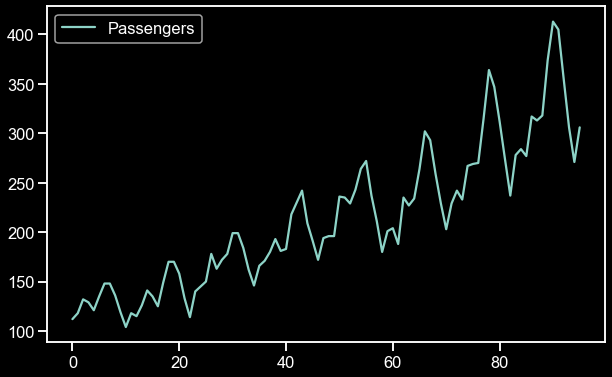

In [5]:
sns.set(rc={'figure.figsize':(10,6.18)})
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
sns.lineplot(data=data, color='lime')
plt.show()

#### here we have an upward trend

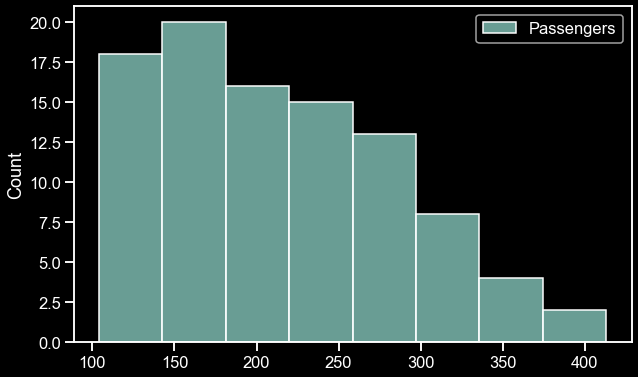

In [6]:
sns.histplot(data=data,color='pink')
plt.show()

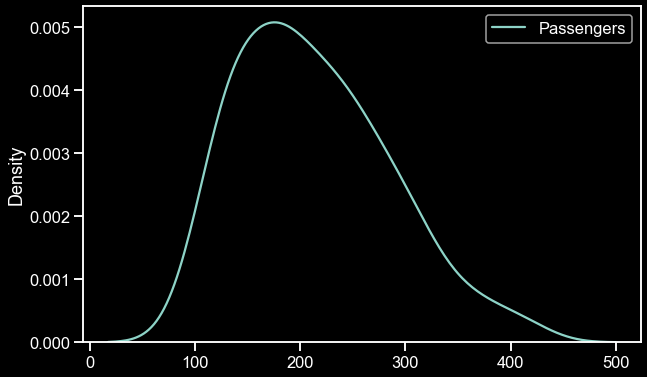

In [7]:

sns.kdeplot(data=data, color='fuchsia')
plt.show() 

# Decompose Data

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plot

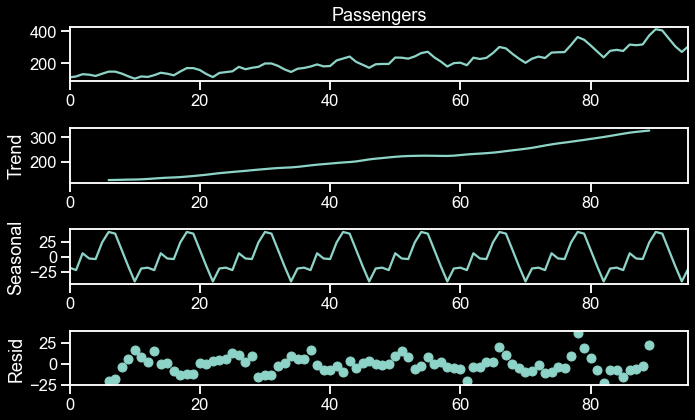

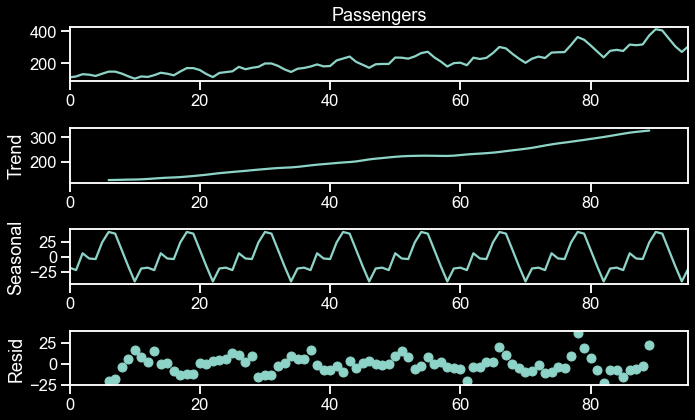

In [9]:
decompose_ts=seasonal_decompose(data['Passengers'],period=12)
decompose_ts.plot()

# Autocorrelation and Partialcorrelation

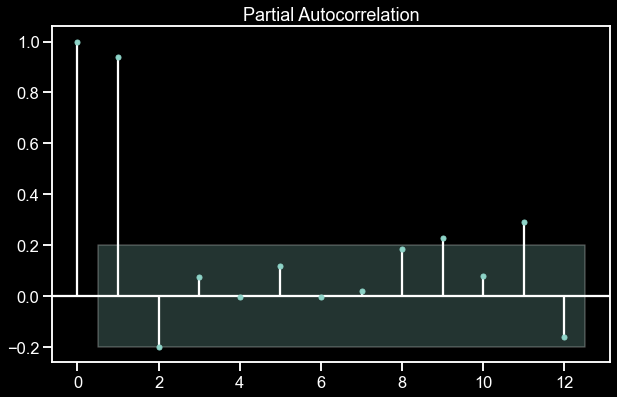

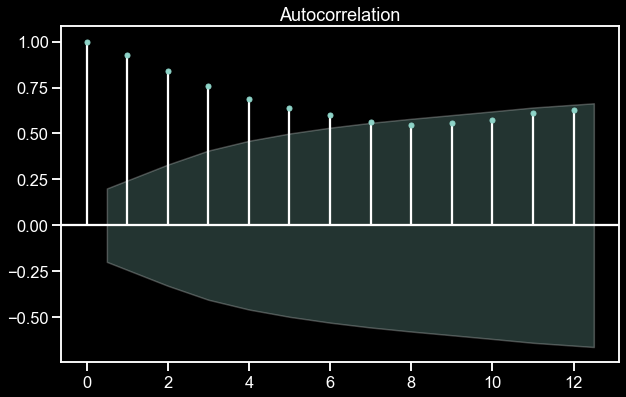

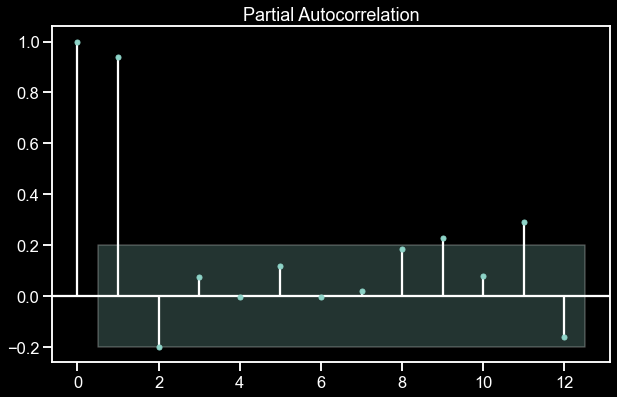

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data['Passengers'],lags=12)
tsa_plots.plot_pacf(data['Passengers'],lags=12)

<AxesSubplot:>

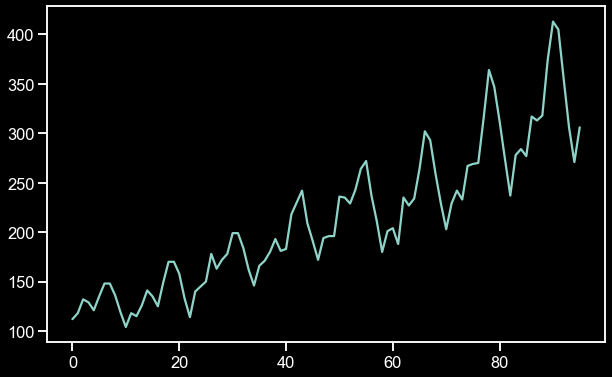

In [11]:
data['Passengers'].plot()

# Data Processing


In [12]:
data['month']=data.Month.dt.strftime("%b")
data['year']=data.Month.dt.strftime("%y")
data.head(5)

,Month,Passengers,month,year
0,1995-01-01,112,Jan,95
1,1995-02-01,118,Feb,95
2,1995-03-01,132,Mar,95
3,1995-04-01,129,Apr,95
4,1995-05-01,121,May,95


In [13]:
data['t']=np.arange(1,(len(data)+1))

In [14]:
data.head()

,Month,Passengers,month,year,t
0,1995-01-01,112,Jan,95,1
1,1995-02-01,118,Feb,95,2
2,1995-03-01,132,Mar,95,3
3,1995-04-01,129,Apr,95,4
4,1995-05-01,121,May,95,5


In [15]:
data.tail()

,Month,Passengers,month,year,t
91,2002-08-01,405,Aug,02,92
92,2002-09-01,355,Sep,02,93
93,2002-10-01,306,Oct,02,94
94,2002-11-01,271,Nov,02,95
95,2002-12-01,306,Dec,02,96


In [16]:
data['t_sqrt']=data['t']**2

In [17]:
data['log_psnger']=np.log(data['Passengers'])

In [18]:
#Generating dummies for months
month_dummies = pd.DataFrame(pd.get_dummies(data['month']))
data = pd.concat([data,month_dummies],axis = 1)

In [19]:
data.head()

,Month,Passengers,month,year,t,t_sqrt,log_psnger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


# Partioning Data

In [20]:
train=data.iloc[:84]

In [21]:
test=data.iloc[84:]

# there are two types of Forcasting Models

## 1) Data Driven Forcasting Models
## 2) Model Based Forcasting Models

##                                    Model Based Forcasting Models

In [22]:
# Linear Model
from sklearn.metrics import mean_squared_error
linear_model=smf.ols('Passengers~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_Exp = mean_squared_error(test.Passengers, pred_linear, squared=False)

In [23]:
rmse_Exp

53.199236534802715

In [24]:
#Exponential
Exp = smf.ols('log_psnger~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Expt = mean_squared_error(test.Passengers, pred_Exp, squared=False)
rmse_Exp

53.199236534802715

In [25]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_sqrt',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_sqrt"]]))
rmse_Quad = mean_squared_error(test.Passengers,pred_Quad, squared=False)
rmse_Quad

48.051888979330975

In [26]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = mean_squared_error(test.Passengers,pred_add_sea, squared=False)
rmse_add_sea

132.8197848142182

In [27]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_sqrt+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sqrt']]))
rmse_add_sea_quad = mean_squared_error(test.Passengers,pred_add_sea_quad, squared=False)
rmse_add_sea_quad

26.360817612086503

In [28]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_psnger~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = mean_squared_error(test.Passengers,pred_Mult_sea, squared=False)
rmse_Mult_sea

326.2267987143024

In [29]:
df=pd.DataFrame({'rmse_linear':rmse_Exp,
                'rmse_exponential':rmse_Expt,
                 'rmse_Quad':rmse_Quad,
                 'rmse_add_sea':rmse_add_sea_quad,
                 'pred_Mult_sea':pred_Mult_sea
                })
df.head(1)

,rmse_linear,rmse_exponential,rmse_Quad,rmse_add_sea,pred_Mult_sea
84,53.199237,325.715061,48.051889,26.360818,5.095286


##### whichever model will have lowest RMSE will be good forcasting model
# PREDICTION GRAPH FOR LINEAR MODEL

In [30]:
datacpy=test
datacpy

,Month,Passengers,month,year,t,t_sqrt,log_psnger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,02,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,02,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,02,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,02,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,02,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,02,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,02,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,02,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,02,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,02,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
datacpy['prediction']=pred_add_sea_quad
datacpy['prediction_quad']=pred_Quad
datacpy

<ipython-input-31-509166b72df9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datacpy['prediction']=pred_add_sea_quad
<ipython-input-31-509166b72df9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datacpy['prediction_quad']=pred_Quad


,Month,Passengers,month,year,t,t_sqrt,log_psnger,Apr,Aug,Dec,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,prediction,prediction_quad
84,2002-01-01,284,Jan,02,85,7225,5.648974,0,0,0,...,1,0,0,0,0,0,0,0,282.098895,296.926546
85,2002-02-01,277,Feb,02,86,7396,5.624018,0,0,0,...,0,0,0,0,0,0,0,0,283.691568,299.669959
86,2002-03-01,317,Mar,02,87,7569,5.758902,0,0,0,...,0,0,0,1,0,0,0,0,311.712813,302.427336
87,2002-04-01,313,Apr,02,88,7744,5.746203,1,0,0,...,0,0,0,0,0,0,0,0,306.305487,305.198678
88,2002-05-01,318,May,02,89,7921,5.762051,0,0,0,...,0,0,0,0,1,0,0,0,306.326732,307.983986
89,2002-06-01,374,Jun,02,90,8100,5.924256,0,0,0,...,0,0,1,0,0,0,0,0,331.062262,310.783257
90,2002-07-01,413,Jul,02,91,8281,6.023448,0,0,0,...,0,1,0,0,0,0,0,0,356.797793,313.596494
91,2002-08-01,405,Aug,02,92,8464,6.003887,0,1,0,...,0,0,0,0,0,0,0,0,356.676181,316.423695
92,2002-09-01,355,Sep,02,93,8649,5.872118,0,0,0,...,0,0,0,0,0,0,0,1,332.268854,319.264861
93,2002-10-01,306,Oct,02,94,8836,5.723585,0,0,0,...,0,0,0,0,0,0,1,0,307.861528,322.119992


<AxesSubplot:>

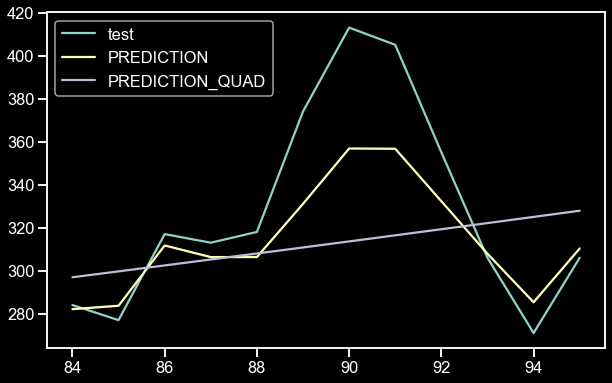

In [32]:
#train['Passengers'].plot(legend=True,label='train')
test['Passengers'].plot(legend=True,label='test')
datacpy['prediction'].plot(legend=True,label='PREDICTION')
datacpy['prediction_quad'].plot(legend=True,label='PREDICTION_QUAD')

###### according to above graph it is clear that Additive Seasonality Quadratic  is good predictor in camparsion to other 

# 2) Data driven models

### Simple Moving average 

In [33]:
data.head()

,Month,Passengers,month,year,t,t_sqrt,log_psnger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


# Simple Moving Average

In [34]:
data['3-month sma']=data.Passengers.rolling(window=3).mean()
data['6-month sma']=data.Passengers.rolling(window=6).mean()
data['12-month sma']=data.Passengers.rolling(window=12).mean()

In [35]:
data.head(100)

,Month,Passengers,month,year,t,t_sqrt,log_psnger,Apr,Aug,Dec,...,Jul,Jun,Mar,May,Nov,Oct,Sep,3-month sma,6-month sma,12-month sma
0,1995-01-01,112,Jan,95,1,1,4.718499,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1995-02-01,118,Feb,95,2,4,4.770685,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1995-03-01,132,Mar,95,3,9,4.882802,0,0,0,...,0,0,1,0,0,0,0,120.666667,NaN,NaN
3,1995-04-01,129,Apr,95,4,16,4.859812,1,0,0,...,0,0,0,0,0,0,0,126.333333,NaN,NaN
4,1995-05-01,121,May,95,5,25,4.795791,0,0,0,...,0,0,0,1,0,0,0,127.333333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,02,92,8464,6.003887,0,1,0,...,0,0,0,0,0,0,0,397.333333,356.666667,316.833333
92,2002-09-01,355,Sep,02,93,8649,5.872118,0,0,0,...,0,0,0,0,0,0,1,391.000000,363.000000,320.416667
93,2002-10-01,306,Oct,02,94,8836,5.723585,0,0,0,...,0,0,0,0,0,1,0,355.333333,361.833333,323.083333
94,2002-11-01,271,Nov,02,95,9025,5.602119,0,0,0,...,0,0,0,0,1,0,0,310.666667,354.000000,325.916667


In [36]:
ma=data[['Passengers','6-month sma','12-month sma','3-month sma']]
ma

,Passengers,6-month sma,12-month sma,3-month sma
0,112,NaN,NaN,NaN
1,118,NaN,NaN,NaN
2,132,NaN,NaN,120.666667
3,129,NaN,NaN,126.333333
4,121,NaN,NaN,127.333333
...,...,...,...,...
91,405,356.666667,316.833333,397.333333
92,355,363.000000,320.416667,391.000000
93,306,361.833333,323.083333,355.333333
94,271,354.000000,325.916667,310.666667


<AxesSubplot:>

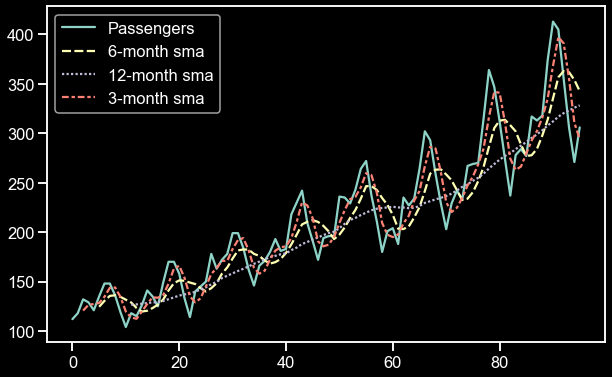

In [37]:
sns.lineplot(data=ma)

# holt's winters method

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train

,Month,Passengers,month,year,t,t_sqrt,log_psnger,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,01,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,01,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,01,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,01,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
model_l1=ExponentialSmoothing(train['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [40]:
prdct_hwm=model_l1.predict(12)
prdct_hwm

12    122.172067
13    115.861301
14    153.282202
15    134.855704
16    134.284930
         ...    
79    363.153338
80    321.863958
81    286.854338
82    250.710708
83    261.287067
Length: 72, dtype: float64

<AxesSubplot:>

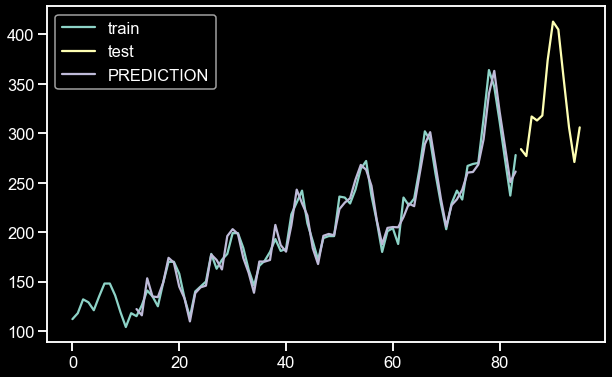

In [41]:
train['Passengers'].plot(legend=True,label='train')
test['Passengers'].plot(legend=True,label='test')
prdct_hwm.plot(legend=True,label='PREDICTION')

In [42]:
# final model

In [43]:
final_model=ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
frc_prdct=final_model.predict(12)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:>

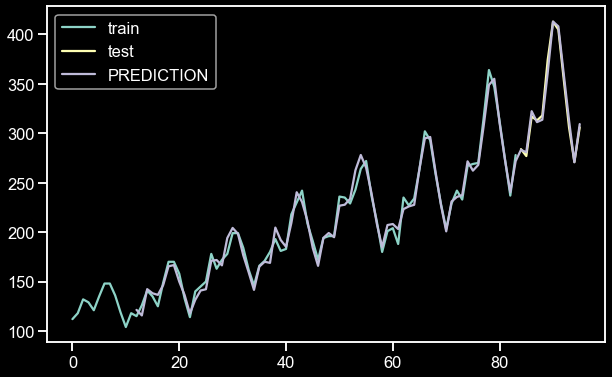

In [44]:
train['Passengers'].plot(legend=True,label='train')
test['Passengers'].plot(legend=True,label='test')
frc_prdct.plot(legend=True,label='PREDICTION')


# Conclusion
##### We have explored all the possible forecasting techniques.
##### We have built our final model from HWE Multiplicative Seasonality and Additive Trend
##### Forecasting for two years has been plotted.